In [102]:
import pandas as pd
from pandas import DataFrame
import sodapy as sd
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np
import pandas_bokeh as pbk
pbk.output_notebook()
import geopandas
import seaborn as sns

Loading BokehJS ...

In [103]:
from sodapy import Socrata

client = Socrata("analisi.transparenciacatalunya.cat", None)

results = client.get("rmgc-ncpb", limit=16774)

# Convert to pandas DataFrame
df = pd.DataFrame.from_records(results)

In [104]:
# Tenim en la columnna 'dat' el dia i l'hora juntes, volem separar-les en dues noves columnes 'data' i 'hora'
dist_morts=df[["dat","f_morts"]]
# Canviem la T que separa dia i hora per identificar la separació dues vegades: amb ' ' i amb '-'
df['dat'] = df['dat'].str.replace('T',' ')
df[['data','hora']] = df["dat"].str.split(" ", 1, expand=True)
df['data']=df['data'].astype("datetime64")
df["hora"] = df["hora"].str.strip(" ")

df[['hores','minuts']] = df["hora"].str.split(":", 1, expand=True)
df["data"].dtypes
df

,any,zona,dat,via,pk,nommun,nomcom,nomdem,f_morts,f_ferits_greus,...,d_vent,grupdialab,hor,gruphor,tipacc,tipdia,data,hora,hores,minuts
0,2010,Zona urbana,2010-01-25 23:33:00.000,SE,999999,CANOVES I SAMALUS,Valles Oriental,Barcelona,0,1,...,"Calma, vent molt suau",Feiners,2333,Nit,Col.lisió de vehicles en marxa,dill-dij,2010-01-25,23:33:00.000,23,33:00.000
1,2010,Carretera,2010-10-31 01:00:00.000,N-240,999,LLEIDA,Segria,Lleida,0,1,...,"Calma, vent molt suau",CapDeSetmana,1,Nit,Sortida de la calcada sense especificar,dg,2010-10-31,01:00:00.000,01,00:00.000
2,2010,Carretera,2010-05-17 15:27:00.000,N-II,7087,FORNELLS DE LA SELVA,Girones,Girona,1,0,...,"Calma, vent molt suau",Feiners,1527,Tarda,Col.lisió de vehicles en marxa,dill-dij,2010-05-17,15:27:00.000,15,27:00.000
3,2010,Zona urbana,2010-08-21 22:30:00.000,SE,999999,BARCELONA,Barcelones,Barcelona,0,2,...,"Calma, vent molt suau",CapDeSetmana,223,Nit,Col.lisió de vehicles en marxa,dis,2010-08-21,22:30:00.000,22,30:00.000
4,2010,Zona urbana,2010-05-07 17:45:00.000,SE,999999,BADALONA,Barcelones,Barcelona,0,1,...,"Calma, vent molt suau",CapDeSetmana,1745,Tarda,Bolcada a la calcada,div,2010-05-07,17:45:00.000,17,45:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16769,2018,Zona urbana,2018-11-20 09:45:00.000,SE,999999,BARCELONA,Barcelones,Barcelona,0,1,...,"Calma, vent molt suau",Feiners,945,Matí,Col.lisió de vehicles en marxa,dill-dij,2018-11-20,09:45:00.000,09,45:00.000
16770,2018,Carretera,2018-12-03 02:01:00.000,AP-7,173,CASTELLVI DE ROSANES,Baix Llobregat,Barcelona,0,1,...,"Calma, vent molt suau",Feiners,201,Nit,Col.lisió de vehicles en marxa,dill-dij,2018-12-03,02:01:00.000,02,01:00.000
16771,2018,Zona urbana,2018-09-30 21:19:00.000,SE,999999,"VENDRELL, EL",Baix Penedes,Tarragona,0,1,...,"Calma, vent molt suau",CapDeSetmana,2119,Tarda,Col.lisió d'un vehicle contra un obstacle de l...,dg,2018-09-30,21:19:00.000,21,19:00.000
16772,2018,Carretera,2018-04-04 10:53:00.000,SE,999999,VIVER I SERRATEIX,Bergueda,Barcelona,0,1,...,"Calma, vent molt suau",Feiners,1053,Matí,Bolcada a la calcada,dill-dij,2018-04-04,10:53:00.000,10,53:00.000


In [105]:
df_hor=df[["hores"]]
# num d'accidents en funció de la comarca i ordenats alfabèticament respecte del nom de la comarca
accperhor = pd.value_counts(df_hor['hores'])
accperhor = accperhor.to_frame() # convertir a Data Frame
accperhor.index.name = 'foo'
accperhor = accperhor.sort_values("foo") # la columna de velocitat es diu index, ordenar-la
accperhor = accperhor.rename(columns={"hores": "# accidents"}) # canviar els noms correctes
accperhor.head()

,# accidents
foo,
00,226
01,188
02,172
03,156
04,167


In [106]:
p_bar=accperhor.plot_bokeh.bar(ylabel='# Accidents', xlabel='Hora', title="Distr d'accidents per hora",alpha=0.6)

In [107]:
# Volem representar un histograma on es vegin la quantitat d'acc per hora cada any
morts_cat=df[["any","dat","data","hores","f_morts"]]
morts_cat.set_index("any", inplace=True)
morts_cat.head()

,dat,data,hores,f_morts
any,,,,
2010,2010-01-25 23:33:00.000,2010-01-25,23,0
2010,2010-10-31 01:00:00.000,2010-10-31,01,0
2010,2010-05-17 15:27:00.000,2010-05-17,15,1
2010,2010-08-21 22:30:00.000,2010-08-21,22,0
2010,2010-05-07 17:45:00.000,2010-05-07,17,0


In [108]:
morts_cat10=morts_cat.loc[['2010']]
morts_cat11=morts_cat.loc[['2011']]
morts_cat12=morts_cat.loc[['2012']]
morts_cat13=morts_cat.loc[['2013']]
morts_cat14=morts_cat.loc[['2014']]
morts_cat15=morts_cat.loc[['2015']]
morts_cat16=morts_cat.loc[['2016']]
morts_cat17=morts_cat.loc[['2017']]
morts_cat18=morts_cat.loc[['2018']]
# num d'accidents en funció de la comarca i ordenats alfabèticament respecte del nom de la comarca
accperhor0 = pd.value_counts(morts_cat10['hores'])
accperhor0 = accperhor0.to_frame() # convertir a Data Frame
accperhor0.index.name = 'foo'
accperhor0 = accperhor0.sort_values("foo") # la columna de velocitat es diu index, ordenar-la
accperhor0 = accperhor0.rename(columns={"hores": "# accidents10"}) # canviar els noms correctes
accperhor0.head()


,# accidents10
foo,
00,30
01,23
02,23
03,24
04,28


In [109]:
accperhor1 = pd.value_counts(morts_cat11['hores'])
accperhor1 = accperhor1.to_frame() # convertir a Data Frame
accperhor1.index.name = 'foo'
accperhor1 = accperhor1.sort_values("foo") # la columna de velocitat es diu index, ordenar-la
accperhor1 = accperhor1.rename(columns={"hores": "# accidents11"}) # canviar els noms correctes
accperhor1.head()

,# accidents11
foo,
00,29
01,20
02,21
03,13
04,21


In [110]:
accperhor2 = pd.value_counts(morts_cat12['hores'])
accperhor2 = accperhor2.to_frame() # convertir a Data Frame
accperhor2.index.name = 'foo'
accperhor2 = accperhor2.sort_values("foo") # la columna de velocitat es diu index, ordenar-la
accperhor2 = accperhor2.rename(columns={"hores": "# accidents12"}) # canviar els noms correctes
accperhor2.head()

,# accidents12
foo,
00,28
01,17
02,15
03,17
04,16


In [111]:
accperhor3 = pd.value_counts(morts_cat13['hores'])
accperhor3 = accperhor3.to_frame() # convertir a Data Frame
accperhor3.index.name = 'foo'
accperhor3 = accperhor3.sort_values("foo") # la columna de velocitat es diu index, ordenar-la
accperhor3 = accperhor3.rename(columns={"hores": "# accidents13"}) # canviar els noms correctes
accperhor3.head()

,# accidents13
foo,
00,18
01,25
02,14
03,20
04,24


In [112]:
accperhor4 = pd.value_counts(morts_cat14['hores'])
accperhor4 = accperhor4.to_frame() # convertir a Data Frame
accperhor4.index.name = 'foo'
accperhor4 = accperhor4.sort_values("foo") # la columna de velocitat es diu index, ordenar-la
accperhor4 = accperhor4.rename(columns={"hores": "# accidents14"}) # canviar els noms correctes
accperhor4.head()

,# accidents14
foo,
00,24
01,19
02,19
03,14
04,12


In [113]:
accperhor5 = pd.value_counts(morts_cat15['hores'])
accperhor5 = accperhor5.to_frame() # convertir a Data Frame
accperhor5.index.name = 'foo'
accperhor5 = accperhor5.sort_values("foo") # la columna de velocitat es diu index, ordenar-la
accperhor5 = accperhor5.rename(columns={"hores": "# accidents15"}) # canviar els noms correctes
accperhor5.head()

,# accidents15
foo,
00,18
01,24
02,25
03,15
04,17


In [114]:
accperhor6 = pd.value_counts(morts_cat16['hores'])
accperhor6 = accperhor6.to_frame() # convertir a Data Frame
accperhor6.index.name = 'foo'
accperhor6 = accperhor6.sort_values("foo") # la columna de velocitat es diu index, ordenar-la
accperhor6 = accperhor6.rename(columns={"hores": "# accidents16"}) # canviar els noms correctes
accperhor6.head()

,# accidents16
foo,
00,30
01,20
02,17
03,15
04,20


In [115]:
accperhor7 = pd.value_counts(morts_cat17['hores'])
accperhor7 = accperhor7.to_frame() # convertir a Data Frame
accperhor7.index.name = 'foo'
accperhor7 = accperhor7.sort_values("foo") # la columna de velocitat es diu index, ordenar-la
accperhor7 = accperhor7.rename(columns={"hores": "# accidents17"}) # canviar els noms correctes
accperhor7.head()

,# accidents17
foo,
00,27
01,21
02,15
03,16
04,15


In [116]:
accperhor8 = pd.value_counts(morts_cat18['hores'])
accperhor8 = accperhor8.to_frame() # convertir a Data Frame
accperhor8.index.name = 'foo'
accperhor8 = accperhor8.sort_values("foo") # la columna de velocitat es diu index, ordenar-la
accperhor8 = accperhor8.rename(columns={"hores": "# accidents18"}) # canviar els noms correctes
accperhor8.head()

,# accidents18
foo,
00,22
01,19
02,23
03,22
04,14


In [118]:
accperhora=pd.concat([accperhor0,accperhor1,accperhor2,accperhor3,accperhor4,accperhor5,accperhor6,accperhor7,accperhor8], axis=1)
accperhora["mitj"]=(accperhora["# accidents10"]+accperhora["# accidents11"]+accperhora["# accidents12"]+accperhora["# accidents13"]+accperhora["# accidents14"]+accperhora["# accidents15"]+accperhora["# accidents16"]+accperhora["# accidents17"]+accperhora["# accidents18"])/9
# accperhora["desv"]=(1/9)**(0.5)*((accperhora["# accidents10"]-accperhora["mitj"])**2+(accperhora["# accidents11"]-accperhora["mitj"])**2+(accperhora["# accidents12"]-accperhora["mitj"])**2+(accperhora["# accidents13"]-accperhora["mitj"])**2+(accperhora["# accidents14"]-accperhora["mitj"])**2+(accperhora["# accidents15"]-accperhora["mitj"])**2+(accperhora["# accidents16"]-accperhora["mitj"])**2+(accperhora["# accidents17"]-accperhora["mitj"])**2+(accperhora["# accidents18"]-accperhora["mitj"])**2)**(0.5)
# accperhora["max"]=accperhora.max(axis=1)
# accperhora["min"]=accperhora.min(axis=1)
# accperhorabox=accperhora[["mitj","desv","max","min"]]
accperhoratrans=accperhora.transpose()
accperhoratrans
mosinteresa=accperhora[["mitj"]]
accperhoratrans

foo,00,01,02,03,04,05,06,07,08,09,...,14,15,16,17,18,19,20,21,22,23
# accidents10,30.000000,23.000000,23.000000,24.000000,28.000000,37.000000,35.000000,76.000000,113.000000,103.000000,...,112.000000,91.000000,99.000000,131.0,156.000000,134.000000,96.000000,94.000000,63.000000,44.000000
# accidents11,29.000000,20.000000,21.000000,13.000000,21.000000,30.000000,59.000000,70.000000,76.000000,85.000000,...,119.000000,98.000000,106.000000,130.0,134.000000,122.000000,97.000000,74.000000,53.000000,32.000000
# accidents12,28.000000,17.000000,15.000000,17.000000,16.000000,43.000000,55.000000,86.000000,84.000000,93.000000,...,112.000000,114.000000,105.000000,108.0,145.000000,137.000000,109.000000,78.000000,51.000000,35.000000
# accidents13,18.000000,25.000000,14.000000,20.000000,24.000000,34.000000,44.000000,84.000000,103.000000,98.000000,...,114.000000,105.000000,120.000000,123.0,139.000000,117.000000,103.000000,73.000000,47.000000,32.000000
# accidents14,24.000000,19.000000,19.000000,14.000000,12.000000,37.000000,46.000000,66.000000,86.000000,88.000000,...,119.000000,101.000000,114.000000,113.0,150.000000,138.000000,100.000000,81.000000,51.000000,35.000000
# accidents15,18.000000,24.000000,25.000000,15.000000,17.000000,30.000000,43.000000,82.000000,94.000000,106.000000,...,111.000000,93.000000,129.000000,127.0,137.000000,110.000000,92.000000,90.000000,59.000000,34.000000
# accidents16,30.000000,20.000000,17.000000,15.000000,20.000000,32.000000,37.000000,63.000000,84.000000,91.000000,...,121.000000,100.000000,93.000000,123.0,145.000000,117.000000,102.000000,60.000000,42.000000,24.000000
# accidents17,27.000000,21.000000,15.000000,16.000000,15.000000,26.000000,44.000000,73.000000,68.000000,96.000000,...,93.000000,100.000000,82.000000,113.0,125.000000,109.000000,99.000000,65.000000,55.000000,46.000000
# accidents18,22.000000,19.000000,23.000000,22.000000,14.000000,36.000000,65.000000,76.000000,85.000000,78.000000,...,87.000000,87.000000,94.000000,121.0,128.000000,118.000000,83.000000,92.000000,55.000000,31.000000
mitj,25.111111,20.888889,19.111111,17.333333,18.555556,33.888889,47.555556,75.111111,88.111111,93.111111,...,109.777778,98.777778,104.666667,121.0,139.888889,122.444444,97.888889,78.555556,52.888889,34.777778


<AxesSubplot:xlabel='foo'>

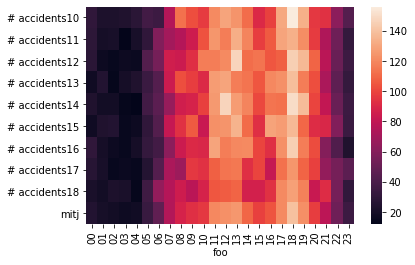

In [119]:
sns.heatmap(accperhoratrans)

In [ ]:
boxplot=accperhoratrans.boxplot(column=['00', '01', '02', '03', '04'])

In [ ]:
boxplot=accperhoratrans.boxplot(column=['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12','13', '14', '15','16', '17', '18','19', '20', '21','22','23'])

In [ ]:
p_bar=accperhor.plot_bokeh.bar(ylabel='# Accidents', xlabel='Hora', title="Distr d'accidents per hora",alpha=0.6)

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
lang=(mosinteresa.index)
stud=mosinteresa["mitj"]
ax.bar(lang,stud,alpha=0.6)
plt.show()

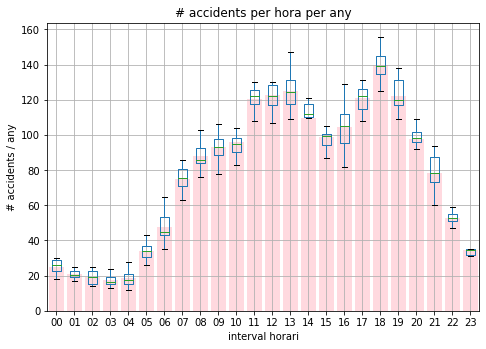

In [120]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
lang=(mosinteresa.index)
lang=lang.astype(int)
lang=lang+1
stud=mosinteresa["mitj"]
ax.bar(lang,stud,color='pink',alpha=0.6)
boxplot=accperhoratrans.boxplot(column=['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12','13', '14', '15','16', '17', '18','19', '20', '21','22','23'], showfliers=False)
plt.title('# accidents per hora per any')
plt.xlabel('interval horari')
plt.ylabel('# accidents / any')

plt.show()
# boxplot shows the max value, min value and the median (min + (max-min)/2)